In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import pandas_ta as ta
import mplfinance as mpf
import scipy
from scipy import stats
from scipy import signal
import math
#https://github.com/neurotrader888

In [2]:
scaled=pd.read_csv('C:\\Users\\nafissaad\\Tutorial\\Fundamental analysis\\Technical analysis\\BTCUSDT86400.csv')
scaled=scaled[-100:]
scaled['date'] = scaled['date'].astype('datetime64[s]')
scaled = scaled.set_index('date')
scaled

,open,high,low,close
date,,,,
2022-09-23,19401.63,19500.00,18531.42,19289.91
2022-09-24,19288.57,19316.14,18805.34,18920.50
2022-09-25,18921.99,19180.21,18629.20,18807.38
2022-09-26,18809.13,19318.96,18680.72,19227.82
2022-09-27,19226.68,20385.86,18816.32,19079.13
...,...,...,...,...
2022-12-27,16919.39,16972.83,16592.37,16706.36
2022-12-28,16706.06,16785.19,16465.33,16547.31
2022-12-29,16547.32,16664.41,16488.91,16633.47


In [3]:
def find_pips(data: np.array, n_pips: int, dist_measure: int):
    # dist_measure
    # 1 = Euclidean Distance
    # 2 = Perpindicular Distance
    # 3 = Vertical Distance

    pips_x = [0, len(data) - 1]  # Index
    pips_y = [data[0], data[-1]] # Price

    for curr_point in range(2, n_pips):

        md = 0.0 # Max distance
        md_i = -1 # Max distance index
        insert_index = -1

        for k in range(0, curr_point - 1):

            # Left adjacent, right adjacent indices
            left_adj = k
            right_adj = k + 1

            time_diff = pips_x[right_adj] - pips_x[left_adj]
            price_diff = pips_y[right_adj] - pips_y[left_adj]
            slope = price_diff / time_diff
            intercept = pips_y[left_adj] - pips_x[left_adj] * slope;

            for i in range(pips_x[left_adj] + 1, pips_x[right_adj]):
                
                d = 0.0 # Distance
                if dist_measure == 1: # Euclidean distance
                    d =  ( (pips_x[left_adj] - i) ** 2 + (pips_y[left_adj] - data[i]) ** 2 ) ** 0.5
                    d += ( (pips_x[right_adj] - i) ** 2 + (pips_y[right_adj] - data[i]) ** 2 ) ** 0.5
                elif dist_measure == 2: # Perpindicular distance
                    d = abs( (slope * i + intercept) - data[i] ) / (slope ** 2 + 1) ** 0.5
                else: # Vertical distance    
                    d = abs( (slope * i + intercept) - data[i] )

                if d > md:
                    md = d
                    md_i = i
                    insert_index = right_adj

        pips_x.insert(insert_index, md_i)
        pips_y.insert(insert_index, data[md_i])

    return pips_x, pips_y

In [4]:
pips_x, pips_y = find_pips(scaled['close'].to_numpy(), 20, 2)
pips_x,pips_y

([0, 2, 6, 9, 11, 17, 24, 27, 43, 47, 48, 59, 61, 66, 68, 82, 84, 87, 94, 99],
 [19289.91,
  18807.38,
  19591.51,
  19056.8,
  20337.82,
  19131.87,
  19549.86,
  19041.92,
  21299.37,
  15922.81,
  17601.15,
  15781.290000000005,
  16603.11,
  16212.91,
  17163.64,
  17803.15,
  16632.12,
  16438.88,
  16919.39,
  16542.4])

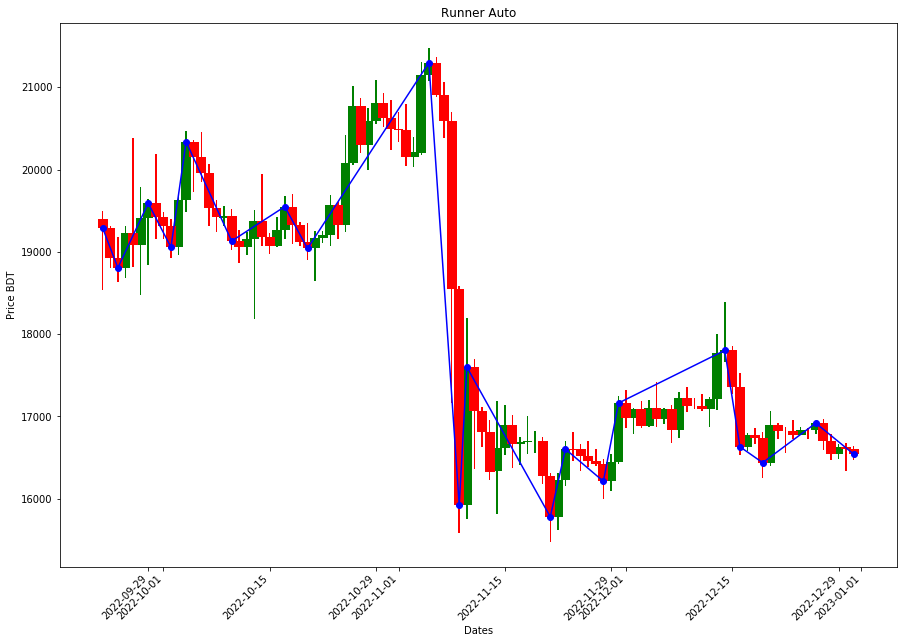

In [5]:
df=scaled

#m=pd.to_datetime(df.index)
#m
##df.set_index(m, inplace=True)
#t=df.asfreq('D')

#create figure
plt.figure(figsize=(15,10))
df1=df
#define width of candlestick elements
width = 1.3
width2 = 0.2

#define up and down prices
up = df1[df1.close>=df1.open]
down = df1[df1.close<df1.open]

#define colors to use
col1 = 'green'
col2 = 'red'

#plot up prices
plt.bar(up.index,up.close-up.open,width,bottom=up.open,color=col1)
plt.bar(up.index,up.high-up.close,width2,bottom=up.close,color=col1)
plt.bar(up.index,up.low-up.open,width2,bottom=up.open,color=col1)

#plot down prices
plt.bar(down.index,down.close-down.open,width,bottom=down.open,color=col2)
plt.bar(down.index,down.high-down.close,width2,bottom=down.close,color=col2)
plt.bar(down.index,down.low-down.open,width2,bottom=down.open,color=col2)

plt.plot(np.array(scaled.index[pips_x]),pips_y, marker='o', color='b')

#rotate x-axis tick labels
plt.xticks(rotation=45, ha='right')

#display candlestick chart
plt.title('Runner Auto')
plt.xlabel('Dates')
plt.ylabel('Price BDT')
plt.show()